## Table of Contents: Linear Regression – Loan Amount Prediction

Last Edited: August 30th, 2024

1. Uploading Dataset (`LoanDataset - LoansDatasest.csv`)
2. Descriptive Analysis (`head()`, `columns`, `dtypes`)
3. Data Cleaning (drop missing values)
4. Currency Conversion & Type Casting (`customer_income`, `loan_amnt`)
5. Outlier Inspection: Boxplot of `customer_income`
6. Outlier Detection (mean ± 3·std)
7. Outlier Filtering (create cleaned subset)
8. Train–Test Split
9. Linear Regression Model Training
10. Evaluation Metrics (R², MSE)
11. Visualization: Regression line on scatter (with/without outliers)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Kellton Tech/Model Code/dataset/LoanDataset - LoansDatasest.csv"
df= pd.read_csv(path)
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [ ]:
df.isnull().sum()

customer_id                3
customer_age               0
customer_income            0
home_ownership             0
employment_duration      895
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate           3116
term_years                 0
historical_default     20737
cred_hist_length           0
Current_loan_status        4
dtype: int64

In [ ]:
df_data = df.dropna()

In [ ]:
df_data.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT
5,6.0,21,9900,OWN,2.0,VENTURE,A,"£2,500.00",7.14,1,N,2,DEFAULT


In [ ]:
df_data.columns

Index(['customer_id', 'customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'term_years', 'historical_default', 'cred_hist_length',
       'Current_loan_status'],
      dtype='object')

In [ ]:
print(df_data.dtypes)

customer_id            float64
customer_age             int64
customer_income         object
home_ownership          object
employment_duration    float64
loan_intent             object
loan_grade              object
loan_amnt               object
loan_int_rate          float64
term_years               int64
historical_default      object
cred_hist_length         int64
Current_loan_status     object
dtype: object


In [ ]:
df_data['loan_amnt'] = df_data['loan_amnt'].replace({'£': '', ',': ''}, regex=True).astype(float)

<ipython-input-9-d02f51b739d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['loan_amnt'] = df_data['loan_amnt'].replace({'£': '', ',': ''}, regex=True).astype(float)


In [ ]:
print(df_data[['customer_income', 'loan_amnt']].head())

  customer_income  loan_amnt
0           59000    35000.0
2            9600     5500.0
3           65500    35000.0
4           54400    35000.0
5            9900     2500.0


In [ ]:
df_data['customer_income'] = df_data['customer_income'].replace({'£': '', ',': ''}, regex=True)

<ipython-input-11-12accff055c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['customer_income'] = df_data['customer_income'].replace({'£': '', ',': ''}, regex=True)


<Axes: ylabel='customer_income'>

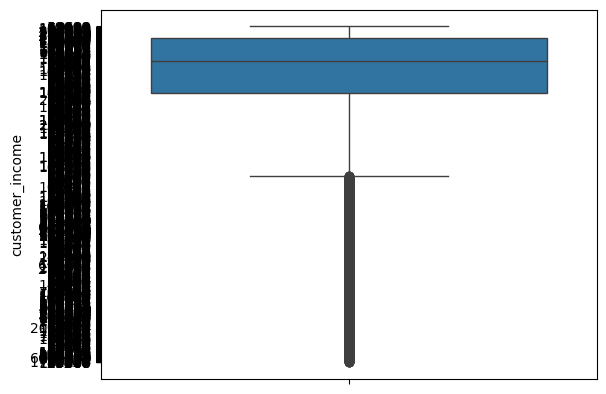

In [ ]:
sns.boxplot(df_data["customer_income"])

In [ ]:
df_data['customer_income'] = pd.to_numeric(df_data['customer_income'], errors='coerce')

<ipython-input-13-4c0496081bfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['customer_income'] = pd.to_numeric(df_data['customer_income'], errors='coerce')


In [ ]:
df_data = df_data.dropna(subset=['customer_income'])


In [ ]:
df_data.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,35000.0,16.02,10,Y,3,DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,35000.0,15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,35000.0,14.27,10,Y,4,DEFAULT
5,6.0,21,9900,OWN,2.0,VENTURE,A,2500.0,7.14,1,N,2,DEFAULT


In [ ]:
mean_income = df_data["customer_income"].mean()
std_income = df_data["customer_income"].std()

upper_limit = mean_income + 3 * std_income
lower_limit = mean_income - 3 * std_income

print(upper_limit)
print(lower_limit)

295900.44694701646
-175845.43821464916


<Axes: ylabel='customer_income'>

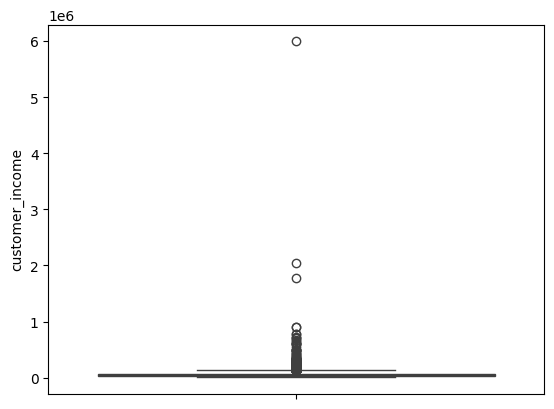

In [ ]:
sns.boxplot(y="customer_income", data= df_data)

In [ ]:
df_data1= df_data[df_data['customer_income']<110000]

In [ ]:
#distributiion curve

<Axes: ylabel='customer_income'>

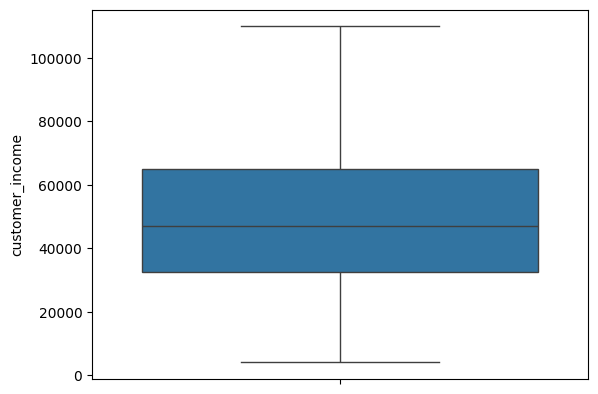

In [ ]:
sns.boxplot(y="customer_income", data= df_data1)

In [ ]:
X = df_data1[['customer_income']]
y = df_data1['loan_amnt']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print("R-squared:", model.score(X_train,y_train))
print("Mean Squared Error:", mean_squared_error(X_test,y_pred))

R-squared: 0.16937943846396109
Mean Squared Error: 1971786902.637069


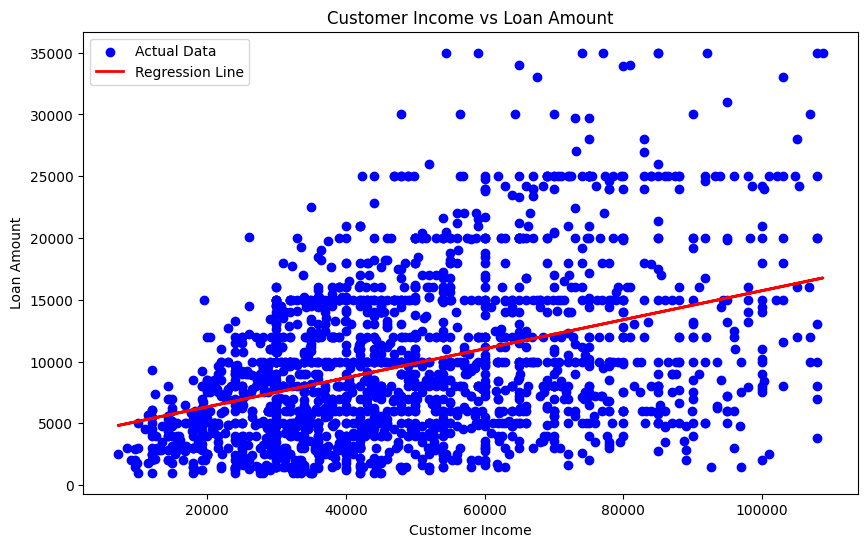

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Customer Income vs Loan Amount')
plt.xlabel('Customer Income')
plt.ylabel('Loan Amount')
plt.legend()
plt.show()